WilcoxonResult(statistic=30798.0, pvalue=0.08734333967236486)

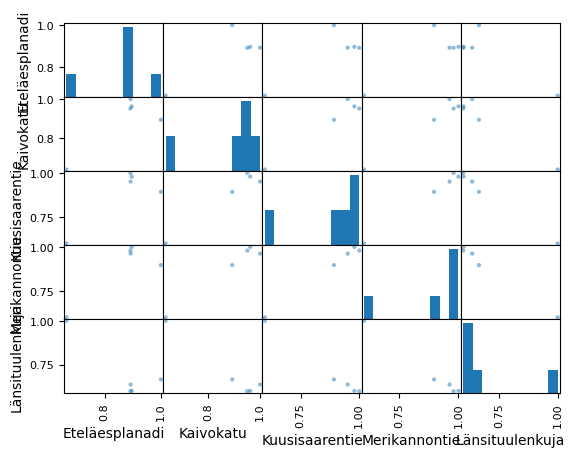

In [85]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro

#1

data = pd.read_csv("51-data.csv")

#1,1
data = data.replace("NA", np.nan)

#1.2
data.loc[data['purchases'] == np.nan, 'purchases'] = 0

#1.3
data.fillna(data['retention_time'].median())

#2
#data2 = pd.read_csv("GDS5037.soft", skiprows=160, header=0, yvalues=1)
#data2

#3
data3 = pd.read_csv("53-data.csv")

#3.1
grouped = data3.groupby('weekday')
grouped = grouped.mean()
dates = pd.DataFrame(grouped, columns=["weekday","Eteläesplanadi","Kaivokatu","Kuusisaarentie","Merikannontie","Länsituulenkuja"])
#dates.plot(x="weekday", y=["Eteläesplanadi","Kaivokatu","Kuusisaarentie","Merikannontie","Länsituulenkuja"], kind="bar")


#3.2
months = data3.groupby('month')
months = months.mean()
df = pd.DataFrame(months, columns=["month","Eteläesplanadi","Kaivokatu","Kuusisaarentie","Merikannontie","Länsituulenkuja"])
#df.plot(x="month", y=["Eteläesplanadi","Kaivokatu","Kuusisaarentie","Merikannontie","Länsituulenkuja"], kind="bar")

#3.3
pairs = pd.DataFrame(data3, columns=["Eteläesplanadi","Kaivokatu","Kuusisaarentie","Merikannontie","Länsituulenkuja"])
corr = pairs.corr(method="spearman")
pd.plotting.scatter_matrix(corr)

#3.4 
#People cycle more on non-weekend days and in the summer.

#4
imagedata = pd.read_csv("54-image.csv")
videodata = pd.read_csv("54-video.csv")

videodata = videodata.rename(columns={'person_id': 'person_id', 'amount_spent': 'amount_spent2'})
combined = pd.concat([imagedata, videodata])

imagelist = combined.groupby("person_id")
imagelist = imagelist.fillna(0)

stats.wilcoxon(imagelist['amount_spent'],imagelist['amount_spent2'])

# p > 0.05, not enough statistifically significant evidence to suggest a difference between adverts.